In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from bokeh.charts import Bar
from bokeh.charts.attributes import cat
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_csv('./COMPANY_SCORES_TOP_HALF.csv')
df = df.drop('id', axis=1)
summary_cols = [col for col in df.columns if '.' not in col and '_' not in col]

In [3]:
X = df[summary_cols]
y = df.WGT_SCORE

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
lr.score(X_test, y_test)

1.0

In [29]:
ranked_coefs = sorted(zip(summary_cols, lr.coef_), key=lambda x: x[1], reverse=True)
ranked_coefs

[('PAY', 0.25459000002464083),
 ('TREAT', 0.24028000001604954),
 ('LEAD', 0.17205000001398121),
 ('CUST', 0.074290000015917262),
 ('PROD', 0.056399999998672928),
 ('JOBS', 0.05566000000982519),
 ('ENV', 0.049800000000041415),
 ('SUPPLY', 0.040820000010509019),
 ('INVEST', 0.039229999996828718),
 ('COMM', 0.016880000003560852)]

In [20]:
np.arange(len(ranked_coefs))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df.sort_values

In [37]:
bar_data = pd.DataFrame(ranked_coefs, columns=['name', 'val']).sort_values('val', ascending=False)
b = Bar(bar_data, label=cat(columns='name', sort=False), 
        values='val', legend=False, ylabel='Coefficient Value')
show(b)

In [39]:
lr_sub = LinearRegression()
sub_columns = [col for col in df.columns if '.' in col]
X_sub = df[sub_columns]

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y, test_size=0.2)

In [40]:
lr_sub.fit(X_train_sub, y_train_sub)
lr_sub.score(X_test_sub, y_test_sub)

1.0

In [41]:
ranked_coef_sub = sorted(zip(sub_columns, lr_sub.coef_), key=lambda x: x[1], reverse=True)

In [42]:
bar_data = pd.DataFrame(ranked_coef_sub, columns=['name', 'val']).sort_values('val', ascending=False)
b = Bar(bar_data, label=cat(columns='name', sort=False), 
        values='val', legend=False, ylabel='Coefficient Value')
show(b)

In [60]:
top_9_factors = ['PAY.FAIR', 'TREAT.DISC', 'TREAT.SAFE', 'LEAD.LAWS',
                 'TREAT.RESPECT', 'JOBS.US', 'PAY.LIVING', 'LEAD.INTEGRITY',
                'PAY.DISC']
groups = df.groupby('JUST_IND')

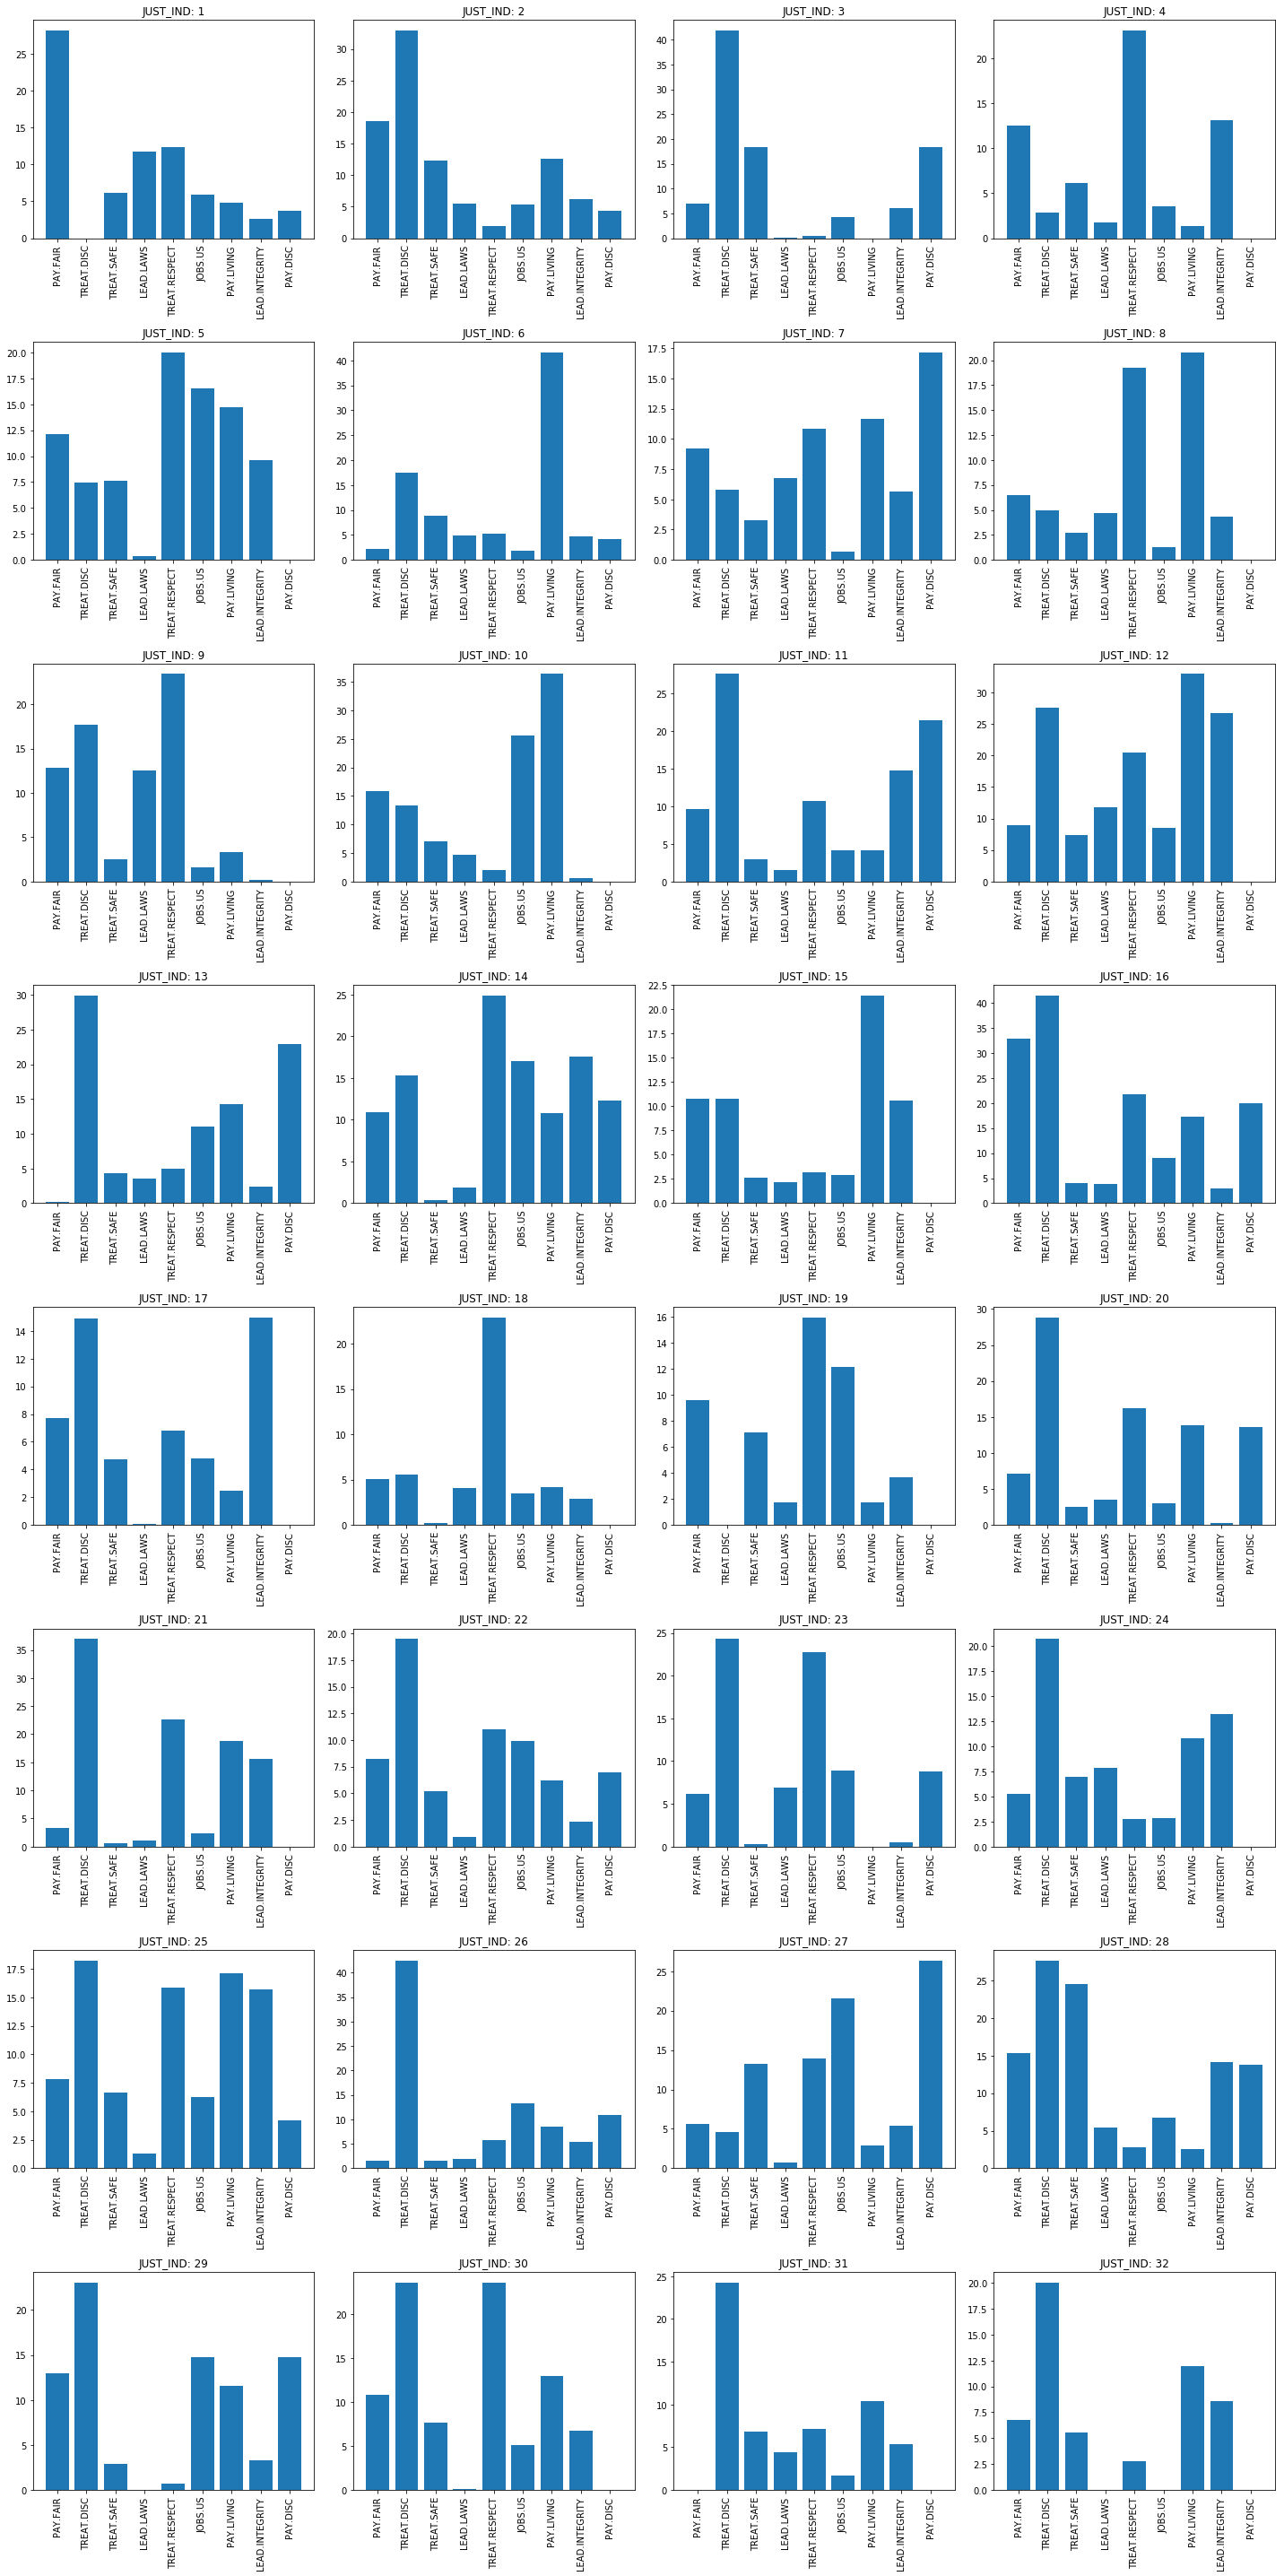

In [98]:
fig = plt.figure(figsize=(20,40))
for ind, g in groups:
    plt.subplot(8,4,ind)
    res = np.abs(g[g.JUST_100 == 'Yes'][top_9_factors].mean(axis=0) - g[g.JUST_100 == 'No'][top_9_factors].mean(axis=0))
    plt.bar(np.arange(len(res)), height=res.values)
    plt.xticks(np.arange(len(res)), top_9_factors, rotation='vertical')
    plt.title('JUST_IND: {}'.format(ind))
    plt.tight_layout()